In [1]:
!python.exe -m pip install --upgrade pip
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install bs4

     ---------------------------------------- 2.1/2.1 MB 13.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0
    Uninstalling pip-23.0:
      Successfully uninstalled pip-23.0


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap
import xml.etree.ElementTree as ET  

In [8]:
# Using XML instead of XLS due to extra 0s in some of the xls files
# Parses XML and returns a dict with {type: total occurrences of that type}
def NPparseLocXML(imageXMLPath: str) -> dict:
    tree = ET.parse(imageXMLPath)
    root = tree.getroot()
    marker_data = root[1][1:]
    
    type_loc = {}
    for marker_type in marker_data:
        typeName = marker_type[0].text
        numTypes = len(marker_type[1:])
        if typeName in type_loc:
            type_loc[typeName] += numTypes
        else:
            type_loc[typeName] = numTypes
    
    return type_loc

In [73]:
testPath = './ExpPatch-Pics/ExpPatchPics-Processed'

# Don't include animation directory 
picDirs = os.listdir(testPath)[1:]
SurveyCountsXLM = {}
SurveryPatchXLM = {}

# Count the types
# Open each survey directory
for picDir in picDirs:
    # read all files in directory that are xls to get the count
    surveyXLM = {}
    patchXLM = {}
    for file in os.listdir(testPath + '/' + picDir):
        if file.endswith('.xml'):
            xlmPath = f'{testPath}/{picDir}/{file}'
            xlmName = file[len('CellCounter_'):-4]
            xlmDict = NPparseLocXML(xlmPath)
            

            for specType in xlmDict:
                if specType in surveyXLM:
                    surveyXLM[specType] += xlmDict[specType]
                else:
                    surveyXLM[specType] = xlmDict[specType]
           
            xlmPatchName = xlmName[xlmName.index('YB-')+3:]
            patchXLM[xlmPatchName] = sum(xlmDict.values())
            
            
                        
    # save types for current survey dir
    SurveyCountsXLM[picDir] = surveyXLM
    SurveryPatchXLM[picDir] = patchXLM

## Convert to DataFrame

In [98]:
# Counts of each type for each Survery
scx_df = pd.DataFrame(SurveyCountsXLM)

# Get total counts for each type across all survey
psx_counts = pd.DataFrame(scx_df.sum(axis=1), columns=['Counts'])

# Patch total counts for each survey
spx_df = pd.DataFrame(SurveryPatchXLM)

# Visualize Type Counts by Survey

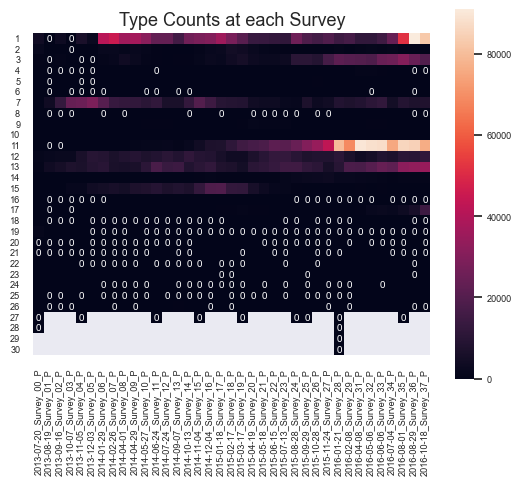

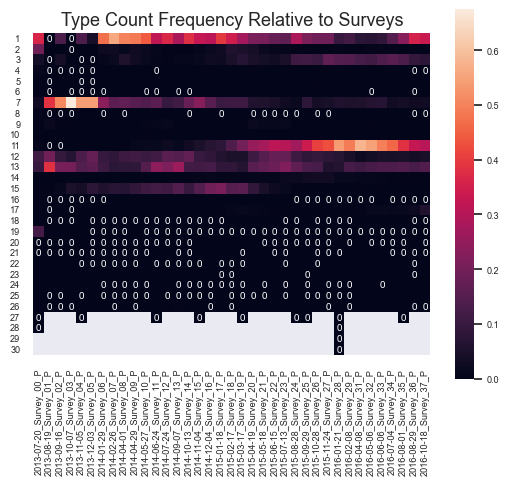

In [99]:
# Type counts at each survey
sns.set(font_scale=.6)
ax = sns.heatmap(scx_df, square=True, annot=True)
for t in ax.texts:
    if float(t.get_text())==0:
        t.set_text(t.get_text()) 
    else:
        t.set_text("") 
plt.title('Type Counts at each Survey', fontsize=13)
plt.yticks(rotation=0) 
plt.show()

# Type counts relative to total survey count
normd_cbs_df = scx_df.div(scx_df.sum(axis=0), axis=1)
sns.set(font_scale=.6)
ax = sns.heatmap(normd_cbs_df, square=True, annot=True)
for t in ax.texts:
    if float(t.get_text())==0:
        t.set_text(t.get_text()) 
    else:
        t.set_text("") 
plt.title('Type Count Frequency Relative to Surveys', fontsize=13)
plt.yticks(rotation=0) 
plt.show()

# Visualize Type Counts by Survey

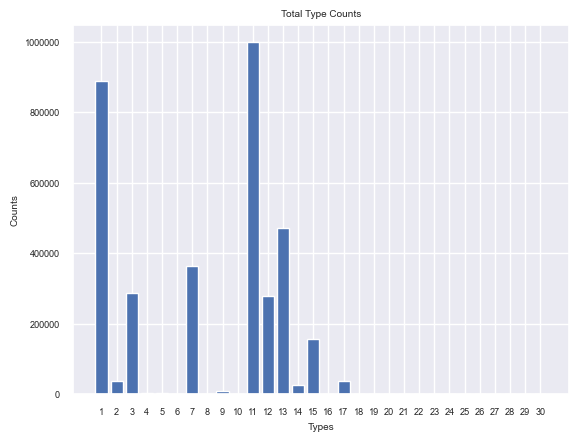

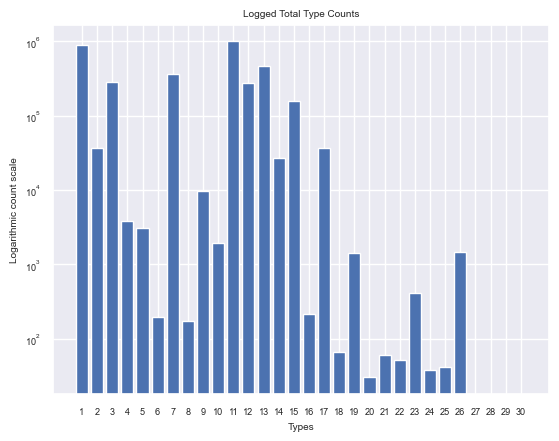

In [103]:
psx_cols = psx_counts.index.values
psx_vals = psx_counts.values.ravel()

# Plot regular counts
plt.bar(psx_cols, psx_vals)
plt.xticks(rotation = 90) 
plt.xlabel('Types')
plt.ylabel('Counts')
plt.title('Total Type Counts')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=0) 
plt.show()

# Plot logged counts
plt.bar(psx_cols, psx_vals)
plt.xticks(rotation = 90) 
plt.ticklabel_format(axis="y", style='plain')
plt.yscale('log')
plt.xlabel('Types')
plt.ylabel('Logarithmic count scale')
plt.title('Logged Total Type Counts')
plt.xticks(rotation=0) 
plt.show()

# Patch Total Counts by Survey

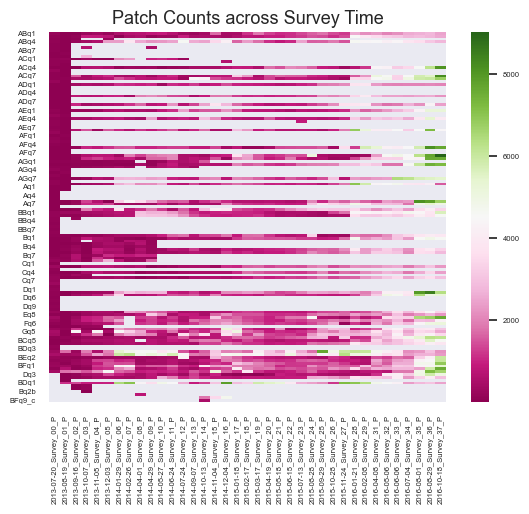

In [101]:
# Show total counts for each patch across Survey time
sns.set(font_scale=.5)
ax = sns.heatmap(spx_df, cmap="PiYG", annot=True)
for t in ax.texts:
    if float(t.get_text())==0:
        t.set_text(t.get_text()) 
    else:
        t.set_text("") 
plt.title('Patch Counts across Survey Time', fontsize=13)
plt.show()

# Dropping Null Patches
#### Certain patches were initially counted, but then dropped because of time consumption. Visualizing only non-null patches and excluding surveys_00 and _01, due to most patches created during those times were discontinued.

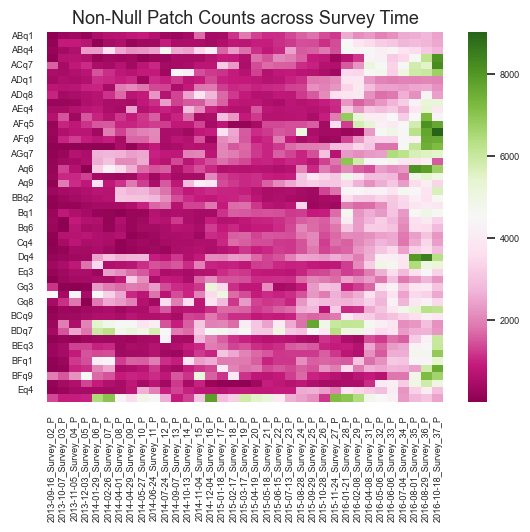

In [102]:
dropped_ps_df = spx_df.drop(columns=['2013-07-20_Survey_00_P', '2013-08-19_Survey_01_P'])
dropped_ps_df = dropped_ps_df.dropna(axis=0)

sns.set(font_scale=.6)
ax = sns.heatmap(dropped_ps_df, cmap="PiYG", annot=True)
for t in ax.texts:
    if float(t.get_text())==0:
        t.set_text(t.get_text()) 
    else:
        t.set_text("") 
plt.title('Non-Null Patch Counts across Survey Time', fontsize=13)
plt.show()